# CRQ1 

#### <font color=green> _What are the time slots of the match with more goals? Let's analyse and visualise the goals distribution into 9-minutes sets for all the matches. I.e., let's transform the minute of a goal from a continuous variable in a discrete variable (e.g. A goal scored in 5th minute, will end up in the interval [0-9)). Remind that every match goes usually from minute 0, to minute 90, but in football it is always added an arbitary amount of extra-time to every half of the match, thus consider also the intervals "45+" and "90+"._
## <font color=red>- Make a barplot with the absolute frequency of goals in all the time slots.
## <font color=red>- Find the top 10 teams that score the most in the interval "81-90".
## <font color=red>- Show if there are players that were able to score at least one goal in 8 different intervals.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import json
import requests
from pandas.io.json import json_normalize

#Define a function that split the columns of my Data Set:

def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)


#Read files and ordinate datasets by removing the columns we don't need from home directory:
homedir = "C:/Users/giuseppe/Desktop/HW2/"

In [2]:
engevents = pd.read_json(homedir+'Events/events_England.json')


In [3]:
tagnumber=[]
for i in range(len(engevents.tags)):
    tagnumber.append(len(engevents.tags[i]))
TAGLIST=[]
for i in range(max(tagnumber)):
    TAG_i=[]
    for j in range(len(engevents.tags)):
        try:
            TAG_i.append(str(engevents.tags[j][i]['id']))
        except:
            TAG_i.append('Notag')
    NEWTAG_i=pd.DataFrame({'Tag_%s'%(i) :TAG_i})
    TAGLIST.append(NEWTAG_i)
TAG=pd.concat(TAGLIST ,axis=1, sort=False)

In [4]:
mixengevents=[engevents,TAG]
newengevents=pd.concat(mixengevents,  axis=1,  sort=False).reindex(engevents.index)
newengevents=newengevents.drop('tags',axis=1)

In [5]:
gols = newengevents[(newengevents["Tag_0"]=="101")&((newengevents['Tag_4']=='1801')|(newengevents['Tag_5']=='1801')|(newengevents['Tag_3']=='1801'))]
owngols = newengevents[(newengevents["Tag_0"]=="102")]

In [6]:
allgols = [gols, owngols]
allgols = pd.concat(allgols)
allgols = allgols.sort_values(by=['matchPeriod','eventSec'])
allgols = allgols.astype({'eventSec': 'int64'})
allgols = allgols.drop('eventName',axis=1).drop('id', axis=1).drop('matchId',axis=1).drop('positions',axis=1)

In [7]:
allgols

,eventId,subEventName,playerId,teamId,matchPeriod,eventSec,subEventId,Tag_0,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5
421043,10,Shot,54,1624,1H,14,100,101,401,201,1204,1801,Notag
363493,10,Shot,11066,1625,1H,39,100,101,401,201,1206,1801,Notag
189375,10,Shot,8623,1628,1H,50,100,101,402,201,1201,1801,Notag
21005,10,Shot,14763,1631,1H,52,100,101,402,201,1201,1801,Notag
501117,10,Shot,254898,1613,1H,63,100,101,401,201,1202,1801,Notag
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618405,10,Shot,353236,1623,2H,3003,100,101,402,201,1201,1801,Notag
527993,10,Shot,12829,1631,2H,3010,100,101,1901,401,201,1201,1801
157213,10,Shot,8422,1628,2H,3065,100,101,402,201,1202,1801,Notag
480724,3,Free kick shot,26150,1631,2H,3078,33,101,401,1101,201,1205,1801


#### Make a barplot with the absolute frequency of goals in all the time slots.

In [8]:
primotempo = allgols[allgols['matchPeriod']=='1H']

In [9]:
secondotempo = allgols[allgols['matchPeriod']=='2H']

In [10]:
firsthalf= []
for i in range(427):
    firsthalf.append(primotempo.eventSec.iloc[i])

secondhalf= []
for i in range(588):
    secondhalf.append(secondotempo.eventSec.iloc[i])

In [11]:
nove = 0
diciotto = 0
ventisette = 0
trentasei = 0
quarantacinque = 0
extra1 = 0

for i in firsthalf:
    if i <= 540:
        nove+=1
    if (i > 540 and i <= 1080):
        diciotto+=1
    if (i > 1080 and i <= 1620):
        ventisette+=1
    if (i > 1620 and i <= 2160):
        trentasei+=1
    if (i > 2160 and i<= 2700):
        quarantacinque+=1
    if i >2700:
        extra1+=1
print(nove,diciotto,ventisette,trentasei,quarantacinque,extra1)




cinqquat = 0
sesstre = 0
settdue = 0
ottuno = 0
novanta = 0
extra2 = 0

for i in secondhalf:
    if i <= 540:
        cinqquat+=1
    if (i > 540 and i <= 1080):
        sesstre+=1
    if (i > 1080 and i <= 1620):
        settdue+=1
    if (i > 1620 and i <= 2160):
        ottuno+=1
    if (i > 2160 and i<= 2700):
        novanta+=1
    if i >2700:
        extra2+=1
print(cinqquat,sesstre, settdue,ottuno,novanta,extra2)

70 78 90 75 88 26
106 102 104 116 112 48


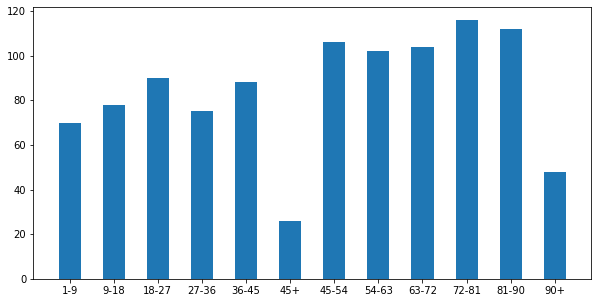

In [20]:
height = [nove, diciotto, ventisette, trentasei, quarantacinque, extra1, cinqquat,sesstre,settdue,ottuno,novanta,extra2]
bars = ('1-9', '9-18', '18-27', '27-36', '36-45', '45+','45-54', '54-63', '63-72', '72-81', '81-90', '90+')
y_pos= np.arange(len(bars))
plt.figure(figsize=(10,5)) 
plt.bar(y_pos, height, width=0.5)
plt.xticks(y_pos, bars)
plt.show()


#### Find 10 teams that score the most in interval 81-90

In [60]:
teams = pd.read_json(homedir+"teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
engteams = teams[(teams["alpha3code"]=="XEN") & (teams["type"]=="club") | (teams["teamname"]=="Swansea City")]
engteams = engteams.drop(columns=['nation', 'alpha3code', 'alpha2code', 'id', 'officialName'])

In [52]:
finalmin = secondotempo[secondotempo.eventSec <2700]
finalmin = finalmin[finalmin.eventSec >=2160]

In [64]:
complete = finalmin.merge(engteams, left_on='teamId', right_on='wyId')

In [147]:
from collections import defaultdict

squads = defaultdict(list)
for idx,row in complete.iterrows():
    squads[row['teamname']].append(row['eventSec'])

sorted_squads= sorted(squads.items(),reverse=True, key = lambda item : len(item[1] ))
tenteams= dict(sorted_squads[0:10])

In [163]:
for key, value in tenteams.items():
    print(key, len([item for item in value if item]))

Manchester City 13
Arsenal 11
Chelsea 10
Manchester United 9
Watford 7
Liverpool 7
Crystal Palace 7
West Ham United 6
West Bromwich Albion 5
AFC Bournemouth 5


#### Show if there are players that were able to score at least one goal in 8 different intervals.

In [164]:
players =pd.read_json(homedir+"players.json") 
players = make_col(players,'birthArea')
players = players.rename(columns={'name':'birth nation'})
players = make_col(players, 'passportArea')
players = players.rename(columns={'name':'nation passport'})
players = make_col(players, 'role')
players = players.rename(columns={'name':'role'})
players = players.drop(columns=['middleName', 'alpha2code', 'alpha3code', 'code2'])

In [177]:
engplayers = players.merge(engteams, left_on='currentTeamId', right_on='wyId')
golplay = engplayers.merge(allgols, left_on='wyId_x', right_on='playerId')
golplay = golplay.drop(columns=['weight', 'height', 'birthDate', 'currentNationalTeamId', 'foot'])
golplay = golplay.drop(columns=['id', 'nation passport'])
golplay = golplay.drop(columns=['wyId_y', 'code3', 'firstName', 'lastName'])
golplay = golplay.drop(columns=['type', 'wyId_x'])

In [183]:
cont = golplay.set_index(["playerId", "teamname"]).count(level="playerId")
cont = cont[cont.teamId >=8]

In [191]:
golplay

,currentTeamId,shortName,birth nation,role,teamname,eventId,subEventName,playerId,teamId,matchPeriod,eventSec,subEventId,Tag_0,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5
0,1624,C. Eriksen,Denmark,Midfielder,Tottenham Hotspur,10,Shot,54,1624,1H,14,100,101,401,201,1204,1801,Notag
1,1624,C. Eriksen,Denmark,Midfielder,Tottenham Hotspur,10,Shot,54,1624,1H,2478,100,101,401,201,1203,1801,Notag
2,1624,C. Eriksen,Denmark,Midfielder,Tottenham Hotspur,10,Shot,54,1624,1H,2510,100,101,401,201,1202,1801,Notag
3,1624,C. Eriksen,Denmark,Midfielder,Tottenham Hotspur,10,Shot,54,1624,1H,2714,100,101,402,201,1207,1801,Notag
4,1624,C. Eriksen,Denmark,Midfielder,Tottenham Hotspur,10,Shot,54,1624,2H,100,100,101,401,201,1205,1801,Notag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,1644,A. Doucour\u00e9,France,Midfielder,Watford,10,Shot,28292,1644,2H,1364,100,101,402,201,1202,1801,Notag
941,1644,A. Doucour\u00e9,France,Midfielder,Watford,10,Shot,28292,1644,2H,2296,100,101,402,201,1204,1801,Notag
942,1644,A. Doucour\u00e9,France,Midfielder,Watford,10,Shot,28292,1644,2H,2672,100,101,403,201,1201,1801,Notag
943,1644,W. Hughes,England,Midfielder,Watford,10,Shot,8981,1644,1H,618,100,101,401,201,1205,1801,Notag


In [268]:
vedi= engplayers.merge(cont, left_on='wyId_x', right_on='playerId')
vedi = vedi.drop(columns=['weight', 'birthDate', 'height', 'foot', 'firstName', 'lastName', 'currentNationalTeamId', 'teamId', 'matchPeriod', 'subEventId', 'Tag_0', 'Tag_1','Tag_2','Tag_3', 'Tag_4', 'Tag_5'])
vedi = vedi.drop(columns=['nation passport', 'id', 'code3', 'currentTeamId_x', 'shortName_y', 'role_y', 'eventId', 'subEventName'])
vedi = vedi.drop(columns=['type', 'currentTeamId_y', 'birth nation_y'])

marcatori = vedi.sort_values(by=['eventSec'], ascending=False).rename(columns={'eventSec':'Goals'})

In [269]:
marcatori

,wyId_x,shortName_x,birth nation_x,role_x,teamname,wyId_y,Goals
29,120353,Mohamed Salah,Egypt,Forward,Liverpool,1612,32
1,8717,H. Kane,England,Forward,Tottenham Hotspur,1624,29
13,8325,S. Ag\u00fcero,Argentina,Forward,Manchester City,1625,21
9,12829,J. Vardy,England,Forward,Leicester City,1631,20
14,11066,R. Sterling,Jamaica,Forward,Manchester City,1625,18
18,7905,R. Lukaku,Belgium,Forward,Manchester United,1611,16
27,15808,Roberto Firmino,Brazil,Forward,Liverpool,1612,15
8,25413,A. Lacazette,France,Forward,Arsenal,1609,14
15,340386,Gabriel Jesus,Brazil,Forward,Manchester City,1625,13
17,26150,R. Mahrez,France,Midfielder,Manchester City,1625,12
